# Model 1: 2 Binary Classifiers

The advantage of implementing this model builds on a reasonable assumption that there exists some pattern for the COVID and non-COVID samples belonging to the infected class.

A three-classes classifier would have to pick up distinguishing features that separate the normal, COVID and non-COVID classes. However, based on the earlier assumption, features of the COVID and non-COVID samples might be similar. Hence, a three-classes classifier might not learn these important features that characterize an infected patient because they do not help the model differentiate the infected COVID and infected non-COVID from the normal samples.

On the other hand, using a 2 binary classifiers model allows for the first binary classifier to focus on the features that can distinguish between normal and infected samples, and for the second binary classifier to focus on the more subtle differences between the COVID and non-COVID samples. Such an approach could possibly yield higher performance.

## Train Binary Classifier #1: Normal vs Infected 

In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

Training...
Train Epoch: 1 @ 10:05:16.781311 
Train Loss: 0.1301 - Train Accuracy: 94.7% - Train F1: 96.5%
Test Loss: 0.6556 - Test Accuracy: 77.0% - Test F1: 84.2%
Train Epoch: 2 @ 10:05:49.543088 
Train Loss: 0.1411 - Train Accuracy: 94.9% - Train F1: 96.5%
Test Loss: 0.4272 - Test Accuracy: 80.9% - Test F1: 86.3%
Train Epoch: 3 @ 10:06:22.583722 
Train Loss: 0.1303 - Train Accuracy: 95.2% - Train F1: 96.7%
Test Loss: 0.5118 - Test Accuracy: 80.1% - Test F1: 85.9%
Train Epoch: 4 @ 10:06:56.157412 
Train Loss: 0.1518 - Train Accuracy: 94.4% - Train F1: 96.1%
Test Loss: 0.4592 - Test Accuracy: 81.9% - Test F1: 87.0%
Train Epoch: 5 @ 10:07:29.383787 
Train Loss: 0.0936 - Train Accuracy: 96.7% - Train F1: 97.8%
Test Loss: 0.7395 - Test Accuracy: 77.4% - Test F1: 84.4%
Train Epoch: 6 @ 10:08:01.675852 
Train Loss: 0.1249 - Train Accuracy: 95.5% - Train F1: 96.9%
Test Loss: 0.5550 - Test Accuracy: 81.1% - Test F1: 86.5%
Train Epoch: 7 @ 10:08:34.580095 
Train Loss: 0.0951 - Train Accuracy:

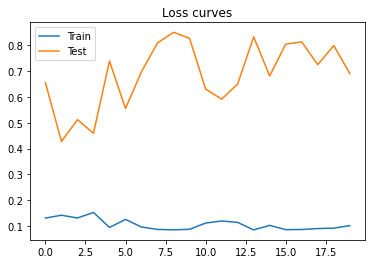

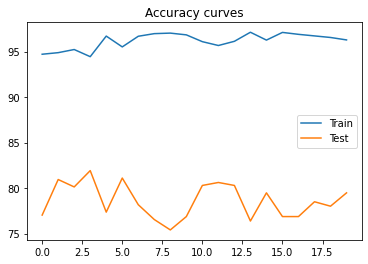

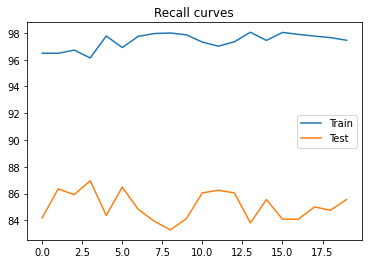

In [2]:
%run train.py binary_classifier_1 --epochs 20 --save_dir "bc1.pt"

## Train Binary Classifier #2: COVID vs Non-COVID

Training...
Train Epoch: 1 @ 10:16:33.416601 
Train Loss: 0.5458 - Train Accuracy: 74.1% - Train F1: 59.7%
Test Loss: 0.3821 - Test Accuracy: 86.3% - Test F1: 79.8%
Train Epoch: 2 @ 10:16:58.120349 
Train Loss: 0.5470 - Train Accuracy: 74.3% - Train F1: 60.1%
Test Loss: 0.4165 - Test Accuracy: 85.3% - Test F1: 78.5%
Train Epoch: 3 @ 10:17:24.640466 
Train Loss: 0.5712 - Train Accuracy: 72.6% - Train F1: 63.1%
Test Loss: 0.4347 - Test Accuracy: 86.1% - Test F1: 81.1%
Train Epoch: 4 @ 10:17:50.477661 
Train Loss: 0.5931 - Train Accuracy: 70.8% - Train F1: 63.4%
Test Loss: 0.4257 - Test Accuracy: 84.2% - Test F1: 79.5%
Train Epoch: 5 @ 10:18:15.560608 
Train Loss: 0.5670 - Train Accuracy: 72.8% - Train F1: 63.6%
Test Loss: 0.4153 - Test Accuracy: 86.3% - Test F1: 81.3%
Train Epoch: 6 @ 10:18:40.609891 
Train Loss: 0.5536 - Train Accuracy: 73.7% - Train F1: 63.1%
Test Loss: 0.3961 - Test Accuracy: 86.8% - Test F1: 81.2%
Train Epoch: 7 @ 10:19:06.791758 
Train Loss: 0.6299 - Train Accuracy:

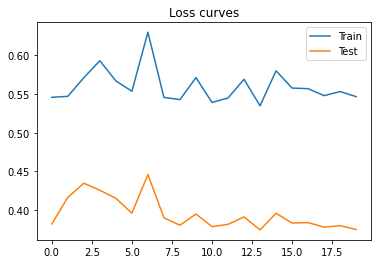

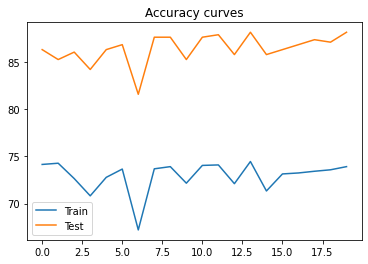

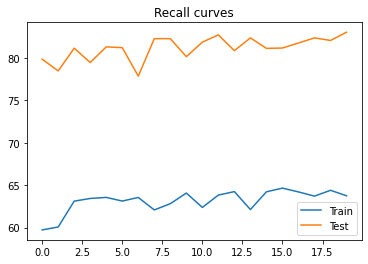

In [3]:
%run train.py binary_classifier_2 --epochs 20 --save_dir "bc2.pt"

## Evaluate Model 1

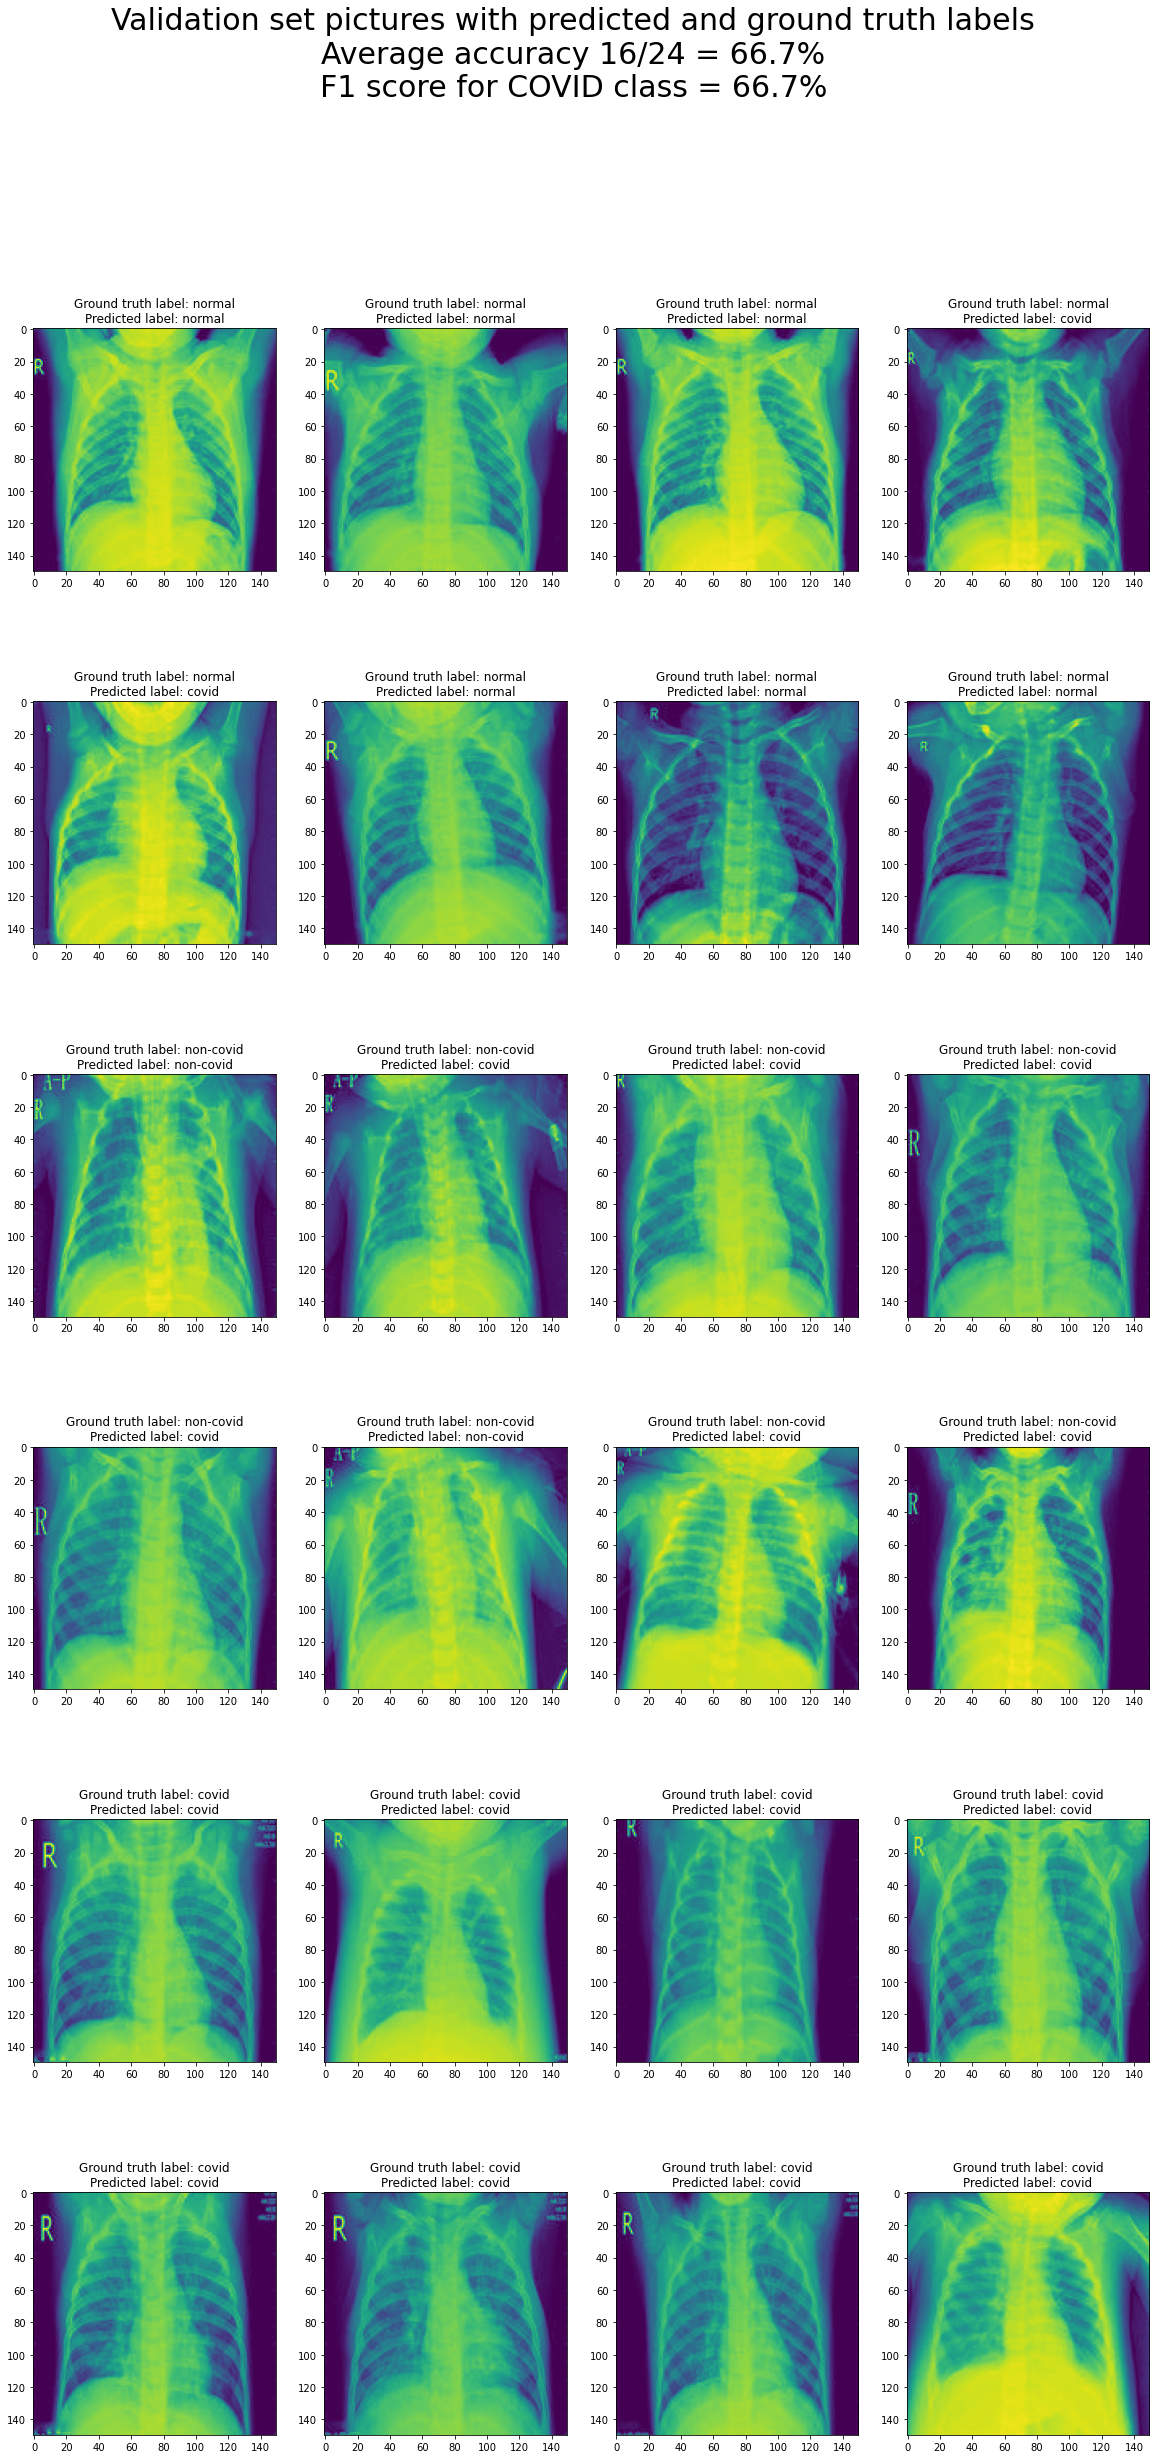

In [2]:
%run evaluate.py two_binary_classifiers --checkpoint "bc1.pt" "bc2.pt"

# Model 2: 3-classes Classifier
Choosing a 3-classes classifier might work better due to class imbalance of the dataset (refer to `Exploration of Dataset.ipynb`). In terms of distribution, 25.7% are normal images, 25.7% are infected COVID images, 48.6% are infected non-COVID images.

The upper bound performance of the 2 binary classifiers model is limited by the performance of the first binary classifier, which classifies samples into either normal or infected. In the train set, there is much more infected images (74.3%) than normal images (25.7%). Hence, the model might be biased toward predicting infected classes, leading to poor model performance. Furthermore, the performance will be further reduced by the second binary classifier, which classifies samples into either COVID or non-COVID samples. This is because there is also class imbalance between the infected COVID samples (34.6%) and infected non-COVID samples (65.4%) in the train set, which likely leads to prediction results favouring infected COVID samples.

Therefore, assuming we do not perform data augmentation to solve the class imbalance problem, using a 3-classes classifier would likely yield better results than the 2 binary classifiers model due to a slightly more balanced training dataset.

## Train Model 2

Training...
Train Epoch: 1 @ 15:07:43.012862 
Train Loss: 0.7036 - Train Accuracy: 73.5%
Test Loss: 0.7622 - Test Accuracy: 68.4%
Train Epoch: 2 @ 15:07:53.954979 
Train Loss: 0.6510 - Train Accuracy: 74.4%
Test Loss: 0.7625 - Test Accuracy: 68.1%
Train Epoch: 3 @ 15:08:04.632627 
Train Loss: 0.6311 - Train Accuracy: 74.5%
Test Loss: 0.7128 - Test Accuracy: 71.2%
Train Epoch: 4 @ 15:08:15.185967 
Train Loss: 0.6111 - Train Accuracy: 75.3%
Test Loss: 0.7055 - Test Accuracy: 70.8%
Train Epoch: 5 @ 15:08:26.239607 
Train Loss: 0.6095 - Train Accuracy: 74.9%
Test Loss: 0.7499 - Test Accuracy: 68.2%
Train Epoch: 6 @ 15:08:36.811685 
Train Loss: 0.5985 - Train Accuracy: 76.1%
Test Loss: 0.7076 - Test Accuracy: 71.2%
Train Epoch: 7 @ 15:08:47.410631 
Train Loss: 0.5957 - Train Accuracy: 75.6%
Test Loss: 0.7011 - Test Accuracy: 70.2%
Train Epoch: 8 @ 15:08:58.104731 
Train Loss: 0.5930 - Train Accuracy: 75.7%
Test Loss: 0.7160 - Test Accuracy: 69.5%
Train Epoch: 9 @ 15:09:08.880964 
Train Loss

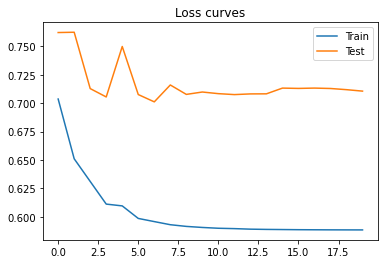

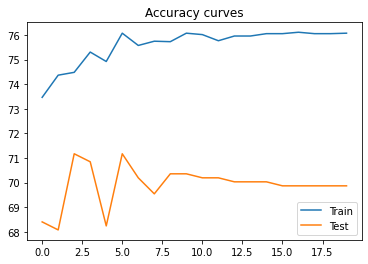

In [4]:
%run train.py three_classes_classifier --epochs 20 --save_dir "three_classes_classifier.pt"

## Evaluate Model 2 

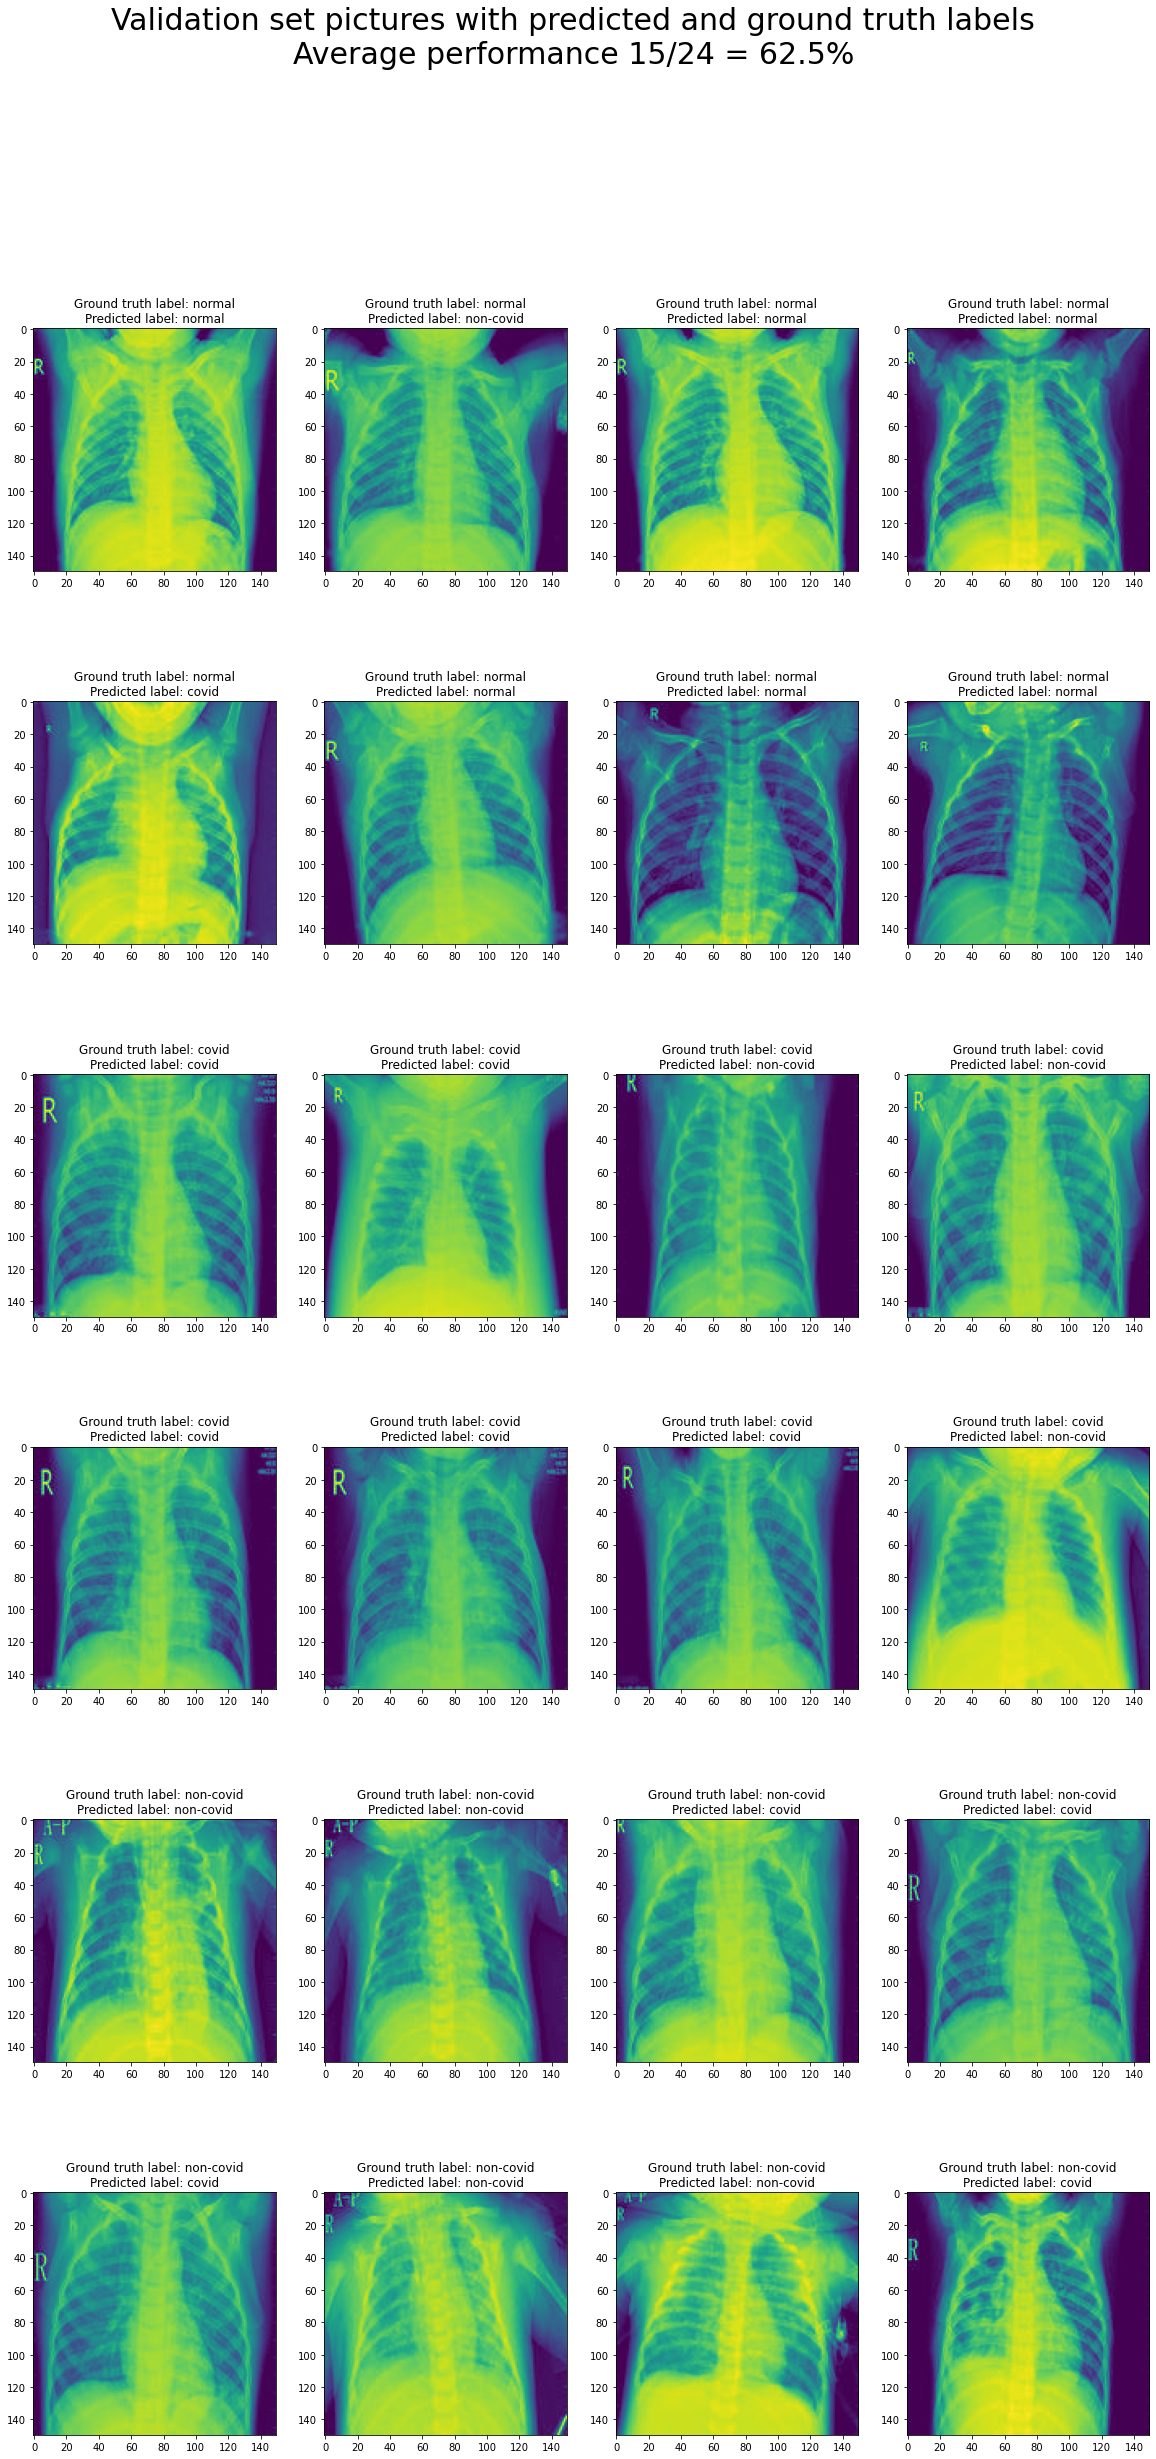

In [5]:
%run evaluate.py three_classes_classifier --checkpoint "three_classes_classifier.pt"